In [2]:
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets
import torch.optim as optim
from torch.utils.data import random_split, DataLoader, Dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import random
from scipy.stats import norm

from sklearn.mixture import GaussianMixture

### Implementation of the autoencoder and the training procedure 

In [43]:
class autoencoder(nn.Module):
    def __init__(self, input_size:int, layers:int, hidden_size:int, bottleneck_size:int):
        super().__init__()
        """
        Parameters
        ----------
        input_size : int
            dimension of input data
        layers : int
            number of hidden layers
        hidden_size : int
            dimension of hidden layers
        bottleneck_size : int
            dimension of bottleneck
        ----------
        """
        
    #construct Encoder
        self.encode = nn.Sequential(nn.Linear(input_size, hidden_size))
        for i in range(layers-1):
            self.encode.add_module(f'ReLU_{i}',nn.ReLU())
            self.encode.add_module(f'Linear_{i+1}',nn.Linear(hidden_size,hidden_size))
        self.encode.add_module(f'ReLU_{layers}',nn.ReLU())
        self.encode.add_module('Bottleneck',nn.Linear(hidden_size,bottleneck_size))
        
    #construct Decoder
        self.decode = nn.Sequential(nn.Linear(bottleneck_size, hidden_size))
        for i in range(layers-1):
            self.decode.add_module(f'ReLU_{i}',nn.ReLU())
            self.decode.add_module(f'Linear_{i+1}',nn.Linear(hidden_size,hidden_size))
        self.decode.add_module(f'ReLU_{layers}',nn.ReLU())
        self.decode.add_module('output',nn.Linear(hidden_size,input_size))
        
    def forward(self,x):
        encoded = self.encode(x)
        decoded = self.decode(encoded)
        return decoded
    
def create_sets(data):
    train_size = int(0.8*len(data)) 
    test_size = int(0.2*len(data)) 
    
    trainset, testset = random_split(data, [train_size, test_size]) 
    
    return (trainset, testset)
    
    
 
def train_autoencoder(n_epochs, model, train_set):
    # data= torch.tensor(data)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    trainset=CustomDataset(train_set)
    # testset=CustomDataset(testset)
    trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
    # testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)
    
    for epoch in range(n_epochs):
            for i,(inputs,labels) in enumerate(trainloader):
                # inputs, labels = data
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                #implement test set...

    
class CustomDataset(Dataset):
    def __init__(self, data):
        self.features = torch.tensor(data, dtype=torch.float32)
        self.labels = torch.tensor(data, dtype=torch.float32)
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

## Exercise 1.1: Grid-Search to find the best Hyperparameters

### Grid-Search of hidden_size Hyperparameter 

C:\Users\klein\AppData\Local\Temp\ipykernel_668\724509727.py:72: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:281.)
  self.features = torch.tensor(data, dtype=torch.float32)


Text(0.5, 1.0, 'Test-Loss over hidden_size')

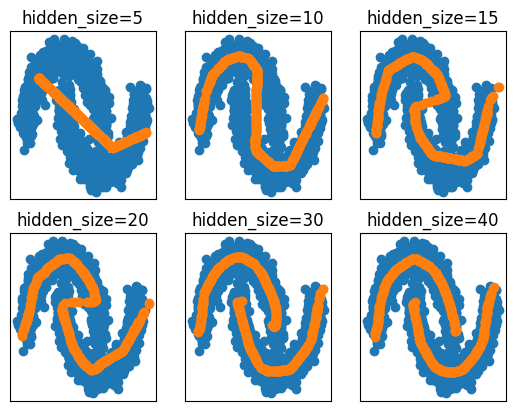

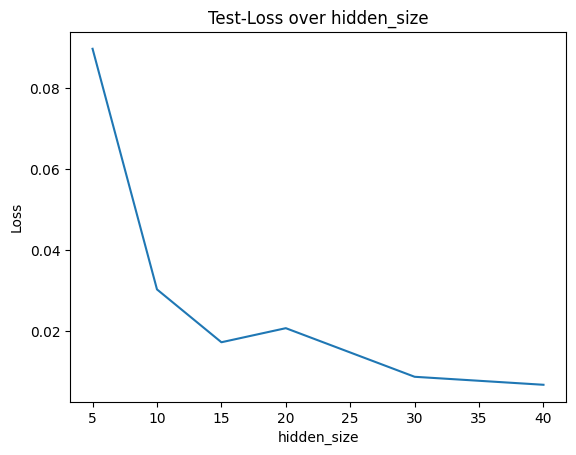

In [ ]:
criterion = nn.MSELoss()

hidden_size_array = [5, 10, 15, 20, 30, 40]
test_losses=[]

fig, axs = plt.subplots(2, 3)
axs = axs.flatten()

data = make_moons(n_samples=2500, noise=0.1)[0]
train_set, test_set = create_sets(data)

for i in range(len(hidden_size_array)):
    input_size = 2
    layers = 5
    hidden_size = hidden_size_array[i]
    bottleneck_size = 1
    
    batch_size = 64
    n_epochs = 75
              
    model = autoencoder(input_size=input_size, layers=layers, 
                        hidden_size=hidden_size, bottleneck_size=bottleneck_size)
    
    train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)
    
    out = model(torch.tensor(test_set, dtype=torch.float32))
    
    test_loss = criterion(out, torch.tensor(test_set,dtype=torch.float32))
    
    out = out.detach().numpy()
   
    test_losses.append(test_loss.detach().numpy())
    
    ax=axs[i]
    ax.set_title(f"hidden_size={hidden_size}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(data[:,0],data[:,1])
    ax.scatter(out[:,0],out[:,1])

plt.figure()
plt.plot(hidden_size_array,test_losses)
plt.xlabel("hidden_size")
plt.ylabel("Loss")
plt.title("Test-Loss over hidden_size")

### Grid-Search of layers Hyperparameter 

Text(0, 0.5, 'Loss')

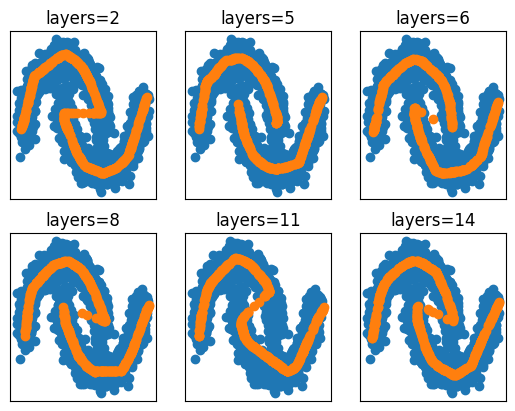

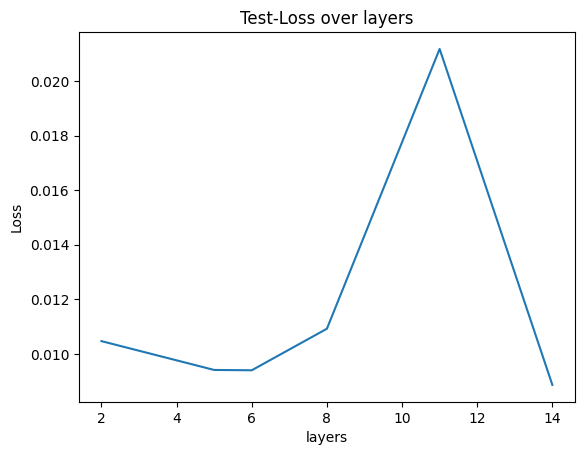

In [5]:
layer_array = [2, 5, 6, 8, 11, 14]
test_losses=[]

fig, axs = plt.subplots(2, 3)
axs = axs.flatten()

data = make_moons(n_samples=2500, noise=0.1)[0]
train_set, test_set = create_sets(data)

for i in range(len(hidden_size_array)):
    input_size = 2
    layers = layer_array[i]
    hidden_size = 30
    bottleneck_size = 1
    
    batch_size = 64
    n_epochs = 75
              
    model = autoencoder(input_size=input_size, layers=layers, 
                        hidden_size=hidden_size, bottleneck_size=bottleneck_size)
    
    train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)
    
    out = model(torch.tensor(test_set, dtype=torch.float32))
    
    test_loss = criterion(out, torch.tensor(test_set,dtype=torch.float32))
    
    out = out.detach().numpy()
   
    test_losses.append(test_loss.detach().numpy())
    
    ax=axs[i]
    ax.set_title(f"layers={layers}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(data[:,0],data[:,1])
    ax.scatter(out[:,0],out[:,1])
    
plt.figure()
plt.plot(layer_array,test_losses)
plt.title("Test-Loss over layers")
plt.xlabel("layers")
plt.ylabel("Loss")

### Grid-Search of epochs Hyperparameter 

Text(0.5, 1.0, 'Test-Loss over epochs')

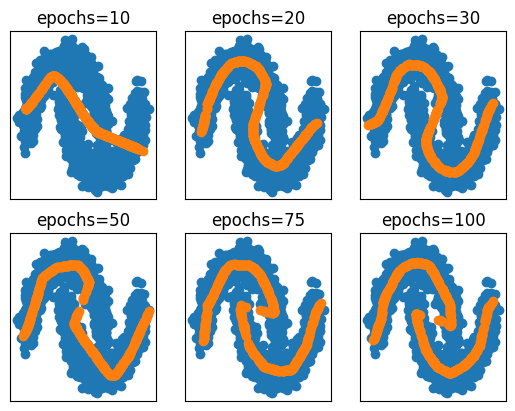

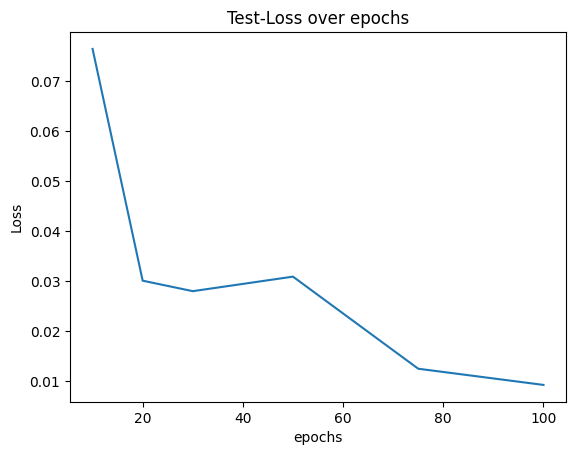

In [6]:
epoch_array = [10, 20, 30, 50, 75, 100]
test_losses=[]

fig, axs = plt.subplots(2, 3)
axs = axs.flatten()

data = make_moons(n_samples=2500, noise=0.1)[0]
train_set, test_set = create_sets(data)

for i in range(len(hidden_size_array)):
    input_size = 2
    layers = 5
    hidden_size = 30
    bottleneck_size = 1
    
    batch_size = 64
    n_epochs = epoch_array[i]
              
    model = autoencoder(input_size=input_size, layers=layers, 
                        hidden_size=hidden_size, bottleneck_size=bottleneck_size)
    
    train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)
    
    out = model(torch.tensor(test_set, dtype=torch.float32))
    
    test_loss = criterion(out, torch.tensor(test_set,dtype=torch.float32))
    
    out = out.detach().numpy()
   
    test_losses.append(test_loss.detach().numpy())
    
    ax=axs[i]
    ax.set_title(f"epochs={n_epochs}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(data[:,0],data[:,1])
    ax.scatter(out[:,0],out[:,1])

plt.figure()
plt.plot(epoch_array,test_losses)
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Test-Loss over epochs")

### Grid-Search of train_set-size Hyperparameter 

Text(0.5, 1.0, 'Test-Loss over data_size')

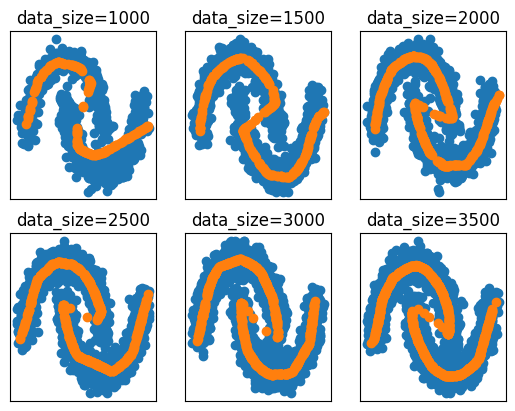

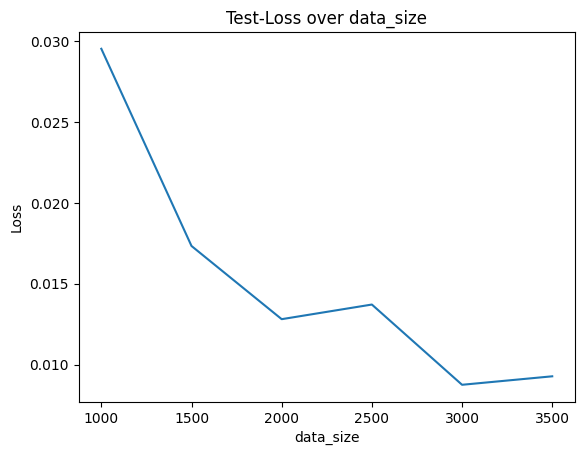

In [7]:
size_array = [1000, 1500, 2000, 2500, 3000, 3500]
test_losses=[]

fig, axs = plt.subplots(2, 3)
axs = axs.flatten()

for i in range(len(hidden_size_array)):
    n_samples = size_array[i]
    data = make_moons(n_samples=n_samples, noise=0.1)[0]
    train_set, test_set = create_sets(data)

    input_size = 2
    layers = 5
    hidden_size = 30
    bottleneck_size = 1
    
    batch_size = 64
    n_epochs = 75
              
    model = autoencoder(input_size=input_size, layers=layers, 
                        hidden_size=hidden_size, bottleneck_size=bottleneck_size)
    
    train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)
    
    out = model(torch.tensor(test_set, dtype=torch.float32))
    
    test_loss = criterion(out, torch.tensor(test_set,dtype=torch.float32))
    
    out = out.detach().numpy()
   
    test_losses.append(test_loss.detach().numpy())
    
    ax=axs[i]
    ax.set_title(f"data_size={n_samples}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(data[:,0],data[:,1])
    ax.scatter(out[:,0],out[:,1])

plt.figure()
plt.plot(size_array,test_losses)
plt.xlabel("data_size")
plt.ylabel("Loss")
plt.title("Test-Loss over data_size")

In [8]:
# train model with optimal parameters
n_samples = 3500
data = make_moons(n_samples=n_samples, noise=0.1)[0]
train_set, test_set = create_sets(data)

input_size = 2
layers = 5
hidden_size = 30
bottleneck_size = 1

batch_size = 64
n_epochs = 75
          
model = autoencoder(input_size=input_size, layers=layers, 
                    hidden_size=hidden_size, bottleneck_size=bottleneck_size)

train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)


Now the model is trained with a good choice of hyperparameters:
* hidden_size: 30
* layers: 5
* epochs: 75
* data_size: 3500

## Exercise 1.2: Training with different datasets

Text(0.5, 1.0, 'Test-Loss over different datasets')

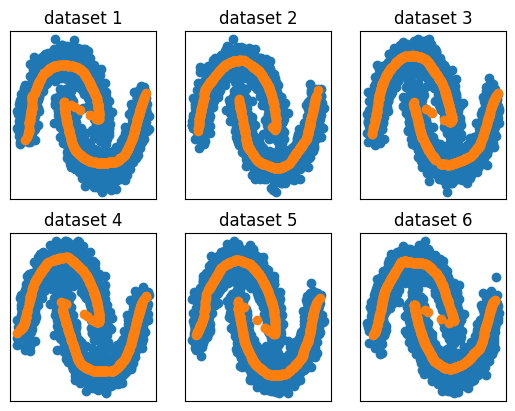

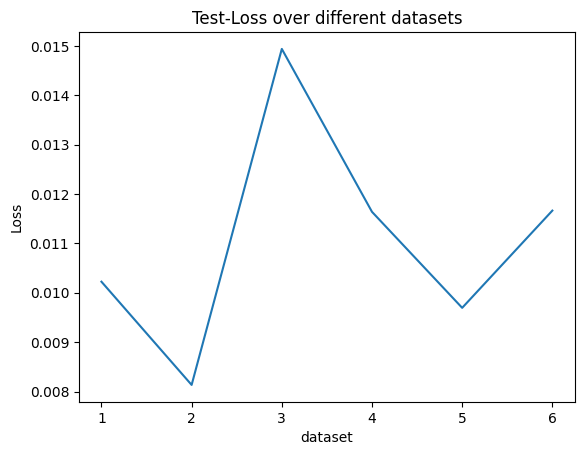

In [9]:
number_datasets = np.arange(6)
test_losses=[]

fig, axs = plt.subplots(2, 3)
axs = axs.flatten()

for i in range(len(number_datasets)):
    n_samples = 3500
    data = make_moons(n_samples=n_samples, noise=0.1)[0]
    train_set, test_set = create_sets(data)

    input_size = 2
    layers = 5
    hidden_size = 30
    bottleneck_size = 1
    
    batch_size = 64
    n_epochs = 75
              
    model = autoencoder(input_size=input_size, layers=layers, 
                        hidden_size=hidden_size, bottleneck_size=bottleneck_size)
    
    train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)
    
    out = model(torch.tensor(test_set, dtype=torch.float32))
    
    test_loss = criterion(out, torch.tensor(test_set,dtype=torch.float32))
    
    out = out.detach().numpy()
   
    test_losses.append(test_loss.detach().numpy())
    
    ax=axs[i]
    ax.set_title(f"dataset {i+1}")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(data[:,0],data[:,1])
    ax.scatter(out[:,0],out[:,1])

plt.figure()
plt.plot(number_datasets+1,test_losses)
plt.xlabel("dataset")
plt.ylabel("Loss")
plt.title("Test-Loss over different datasets")

## Exercise 1.3: Generative Model GMM

In [10]:
class GMM:
    def __init__(self, n: int, X, iters: int):
        """
       Parameters
       ----------
       n : int
           number of gaussian clusters 
       iters : int
           number of iterations
        ----------
       """
        self.n = n  #number of gaussians in the model
        self.X = X  #data points
        self.iters = iters 
        
        #initialize weights 
        self.w = [random.random() for i in range(self.n)]
        self.w = self.w / np.sum(self.w) #normalize weights 

       # for 2d data 
       # self.means = [
        #    [random.uniform(min(X[:,0]),max(X[:,0])) , random.uniform(min(X[:,1]),max(X[:,1])) ] 
         #                                                          for j in range(self.n)]
        #self.covs = [np.eye(2)/20 for i in range(self.n) ]
        ## self.covs = [ (np.var(X, axis=0)) * self.n for i in range(self.n) ]

        
    # for 1d data 
        self.means = [ random.uniform(min(X),max(X))for j in range(self.n)]
        self.covs = [5.8/2 for i in range(self.n) ]

        self.R = np.zeros((len(self.X),n)) 
       
        
        
    def e_step(self):
       
        #load weights
        means = self.means
        covs = self.covs
        X = self.X
        n= self.n
        w = self.w
        R= self.R
 
        #compute responsibilities for every datapoint x_n in every cluster k
        for i in range(len(X)):
            for k in range(n):
                #P = multivariate_normal.pdf(X[i,:], means[k], covs[k])
                P = norm.pdf(X[i], means[k], covs[k])
                R[i,k] = w[k] * P
            R[i,:] = R[i,:] / (sum(R[i,:]+ 1e-6)) # normalize over k
            
        self.R = R + 1e-6
        
    
    def m_step(self):     
        
        covs = self.covs
        X = self.X
        n= self.n
        R= self.R
        
        means_updated = [
            (sum(R[:,k].reshape(len(X),1) * X)) / sum(R[:,k]) 
            for k in range(n)]
        
        covs_updated = [
                        sum( 
                            [ (R[i,k] * X[i]* X[i]) / sum(R[:,k])
                         for i in range(len(X))] 
                            )
                        - means_updated[k] * means_updated[k]
            for k in range(n)]
        
        weights_updated = [sum(R[:,k])/len(X) for k in range(n)]
        
        self.means = means_updated
        self.covs = covs_updated
        self.w = weights_updated

    def fit(self):
        nIter = self.iters
        for i in range(nIter):
            self.e_step()
            self.m_step()   
    
    def output(self):
        return self.means, self.covs, self.w
    
    def sample(self, N):
        weights = self.w
        covs = self.covs
        means = self.means
        #normalization of weights needed bcs numerical inaccuracy
        weights = weights / sum(weights)
        
        index = np.random.choice(len(weights), size=N, p=weights)
        samples = [np.random.multivariate_normal(means[i] , covs[i]) for i in index]
        
        return samples
        

    def plot(self):
        x = self.X
        means,covs, weights = self.output()
        
        x1= x[:,0] 
        x2= x[:,1]
        x_plot = np.arange(min(x1), max(x1), 0.01)
        y_plot = np.arange(min(x2), max(x2), 0.01)
        x_plot_grid, y_plot_grid = np.meshgrid(x_plot, y_plot)
        coordinates = np.array([x_plot_grid.ravel(), y_plot_grid.ravel()]).T   
            
        plt.figure(1)
        plt.clf()
        
        for i in range(nGaussians):
                mean = means[i]
                cov = covs[i]
                z_grid = multivariate_normal(mean, cov).pdf(coordinates).reshape(x_plot_grid.shape)
                plt.contour(x_plot_grid, y_plot_grid, z_grid)
        
 

(array([0.02714286, 0.02571429, 0.02428571, 0.02428571, 0.01714286,
        0.04428571, 0.03571428, 0.06142857, 0.12285714, 0.12285714,
        0.01      , 0.09714285, 0.08714285, 0.04571429, 0.02285714,
        0.03428571, 0.02      , 0.01285714, 0.01714286, 0.02142857,
        0.02714286, 0.02142857, 0.01428571, 0.01142857, 0.00857143,
        0.01428571, 0.00571429, 0.01      , 0.00714286, 0.00571429]),
 array([-2.04824948, -1.76928139, -1.49031329, -1.21134508, -0.93237698,
        -0.65340889, -0.37444076, -0.09547265,  0.18349548,  0.46246359,
         0.74143171,  1.02039981,  1.2993679 ,  1.57833612,  1.85730422,
         2.13627243,  2.41524053,  2.69420862,  2.97317672,  3.25214481,
         3.53111291,  3.81008101,  4.08904934,  4.3680172 ,  4.64698553,
         4.92595339,  5.20492172,  5.48388958,  5.76285791,  6.04182577,
         6.32079411]),
 <BarContainer object of 30 artists>)

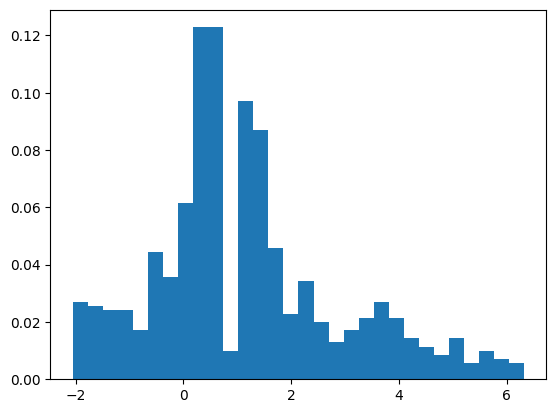

In [11]:
code = model.encode(torch.tensor(test_set, dtype=torch.float32))
code = code.detach().numpy()

hist = np.histogram(code,bins = 30)[0]
hist = hist/sum(hist)

number_gaussians = 10

gmm_model = GaussianMixture(number_gaussians)
gmm_model.fit(code)

weights = np.ones_like(code)/float(len(code))
plt.hist(code, bins=30, weights=weights)

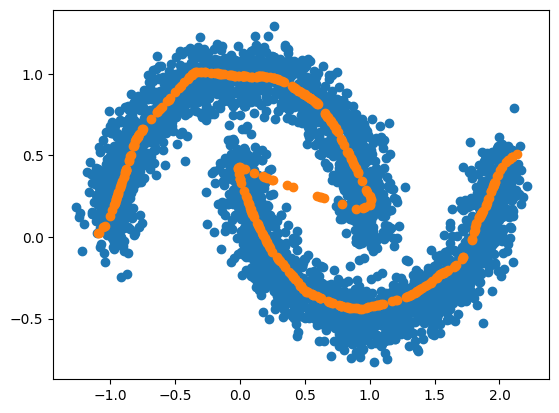

In [12]:
no_samples= 400
z_samples= gmm_model.sample(no_samples)[0]

out = model.decode(torch.tensor(z_samples, dtype=torch.float32))
out = out.detach().numpy()

plt.scatter(data[:,0],data[:,1])
plt.scatter(out[:,0],out[:,1])


## Exercise 1.4: trained model with noise level 0.2

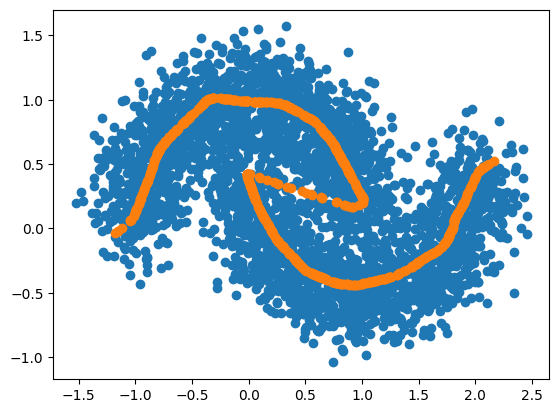

In [13]:
n_samples = 3500
data = make_moons(n_samples=n_samples, noise=0.2)[0]
train_set, test_set = create_sets(data)
out = model(torch.tensor(test_set, dtype=torch.float32))
out = out.detach().numpy()

plt.scatter(data[:,0],data[:,1])
plt.scatter(out[:,0],out[:,1])

## Exercise 1.5: new training with noise level 0.2

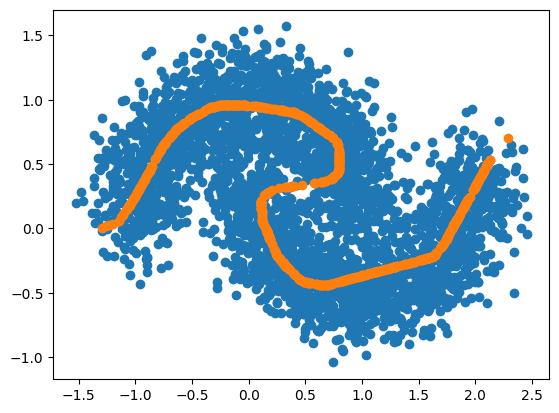

In [14]:
input_size = 2
layers = 5
hidden_size = 30
bottleneck_size = 1

batch_size = 64
n_epochs = 75
          
model = autoencoder(input_size=input_size, layers=layers, 
                    hidden_size=hidden_size, bottleneck_size=bottleneck_size)

train_autoencoder(n_epochs=n_epochs, model=model, train_set=train_set)

out = model(torch.tensor(test_set, dtype=torch.float32))
out = out.detach().numpy()

plt.scatter(data[:,0],data[:,1])
plt.scatter(out[:,0],out[:,1])

# Exercise 2

In [19]:
import torch
import torch.nn.functional as F

def compute_mmd(codes, bandwidths=None):
    """
    Computes the MMD loss between the codes (output of the encoder) and a 2D standard normal distribution.

    Parameters:
        codes (torch.Tensor): The latent codes from the encoder (batch_size x bottleneck_size).
        bandwidths (list of float): Bandwidths for the kernel. Defaults to [0.01, 0.1, 1.0, 10.0, 100.0].
    
    Returns:
        mmd_loss (torch.Tensor): The computed MMD loss.
    """
    if bandwidths is None:
        bandwidths = [0.01, 0.1, 1.0, 10.0, 100.0]
    
    # Generate samples from a 2D standard normal distribution
    normal_samples = torch.randn_like(codes)

    # Pairwise squared distances
    def pairwise_distances(X, Y):
        XX = (X ** 2).sum(dim=1, keepdim=True)
        YY = (Y ** 2).sum(dim=1, keepdim=True)
        XY = torch.mm(X, Y.T)
        return XX + YY.T - 2 * XY

    # Compute pairwise distances
    dist_codes = pairwise_distances(codes, codes)
    dist_normal = pairwise_distances(normal_samples, normal_samples)
    dist_cross = pairwise_distances(codes, normal_samples)

    # Compute MMD with multi-bandwidth kernel
    mmd_loss = 0
    for bandwidth in bandwidths:
        kernel_codes = torch.exp(-dist_codes / bandwidth)
        kernel_normal = torch.exp(-dist_normal / bandwidth)
        kernel_cross = torch.exp(-dist_cross / bandwidth)
        
        mmd_loss += kernel_codes.mean() + kernel_normal.mean() - 2 * kernel_cross.mean()

    return mmd_loss


In [ ]:
def train_autoencoder_with_mmd(input_size, bottleneck_size, hidden_size, layers, train_size, epochs, 
                               lr, batch_size, noise, mmd_weight, bandwidths):
    """
    Train the autoencoder with an MMD regularization term.
    
    Parameters:
        input_size (int): Input dimensionality.
        bottleneck_size (int): Latent space dimensionality.
        hidden_size (int): Hidden layer size.
        layers (int): Number of hidden layers.
        train_size (int): Number of training samples.
        epochs (int): Number of epochs to train.
        lr (float): Learning rate.
        batch_size (int): Batch size.
        noise (float): Noise level for data.
        mmd_weight (float): Weight for the MMD loss.
        bandwidths (list of float): Bandwidths for the MMD kernel.
    
    Returns:
        trained_autoencoder (Autoencoder): The trained autoencoder model.
    """
    # Generate training data
    train_data = make_moons(n_samples=2500, noise=0.1)[0]
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    
    # Initialize the autoencoder
    Autoencoder = autoencoder(input_size,layers, hidden_size ,bottleneck_size)
    optimizer = torch.optim.Adam(Autoencoder.parameters(), lr=lr)
    
    for epoch in range(epochs):
        total_loss = 0
        total_recon_loss = 0
        total_mmd_loss = 0

        for batch in train_loader:
            optimizer.zero_grad()
            batch=batch.float()
            # Forward pass
            reconstructed = Autoencoder(batch)
            codes = Autoencoder.encode(batch)

            # Reconstruction loss
            recon_loss = F.mse_loss(reconstructed, batch)

            # MMD loss
            mmd_loss = compute_mmd(codes, bandwidths)

            # Combined loss
            loss = recon_loss + mmd_weight * mmd_loss

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            total_recon_loss += recon_loss.item()
            total_mmd_loss += mmd_loss.item()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss:.4f}, Recon Loss: {total_recon_loss:.4f}, MMD Loss: {total_mmd_loss:.4f}")

    return Autoencoder


In [ ]:
trained_autoencoder_mmd = train_autoencoder_with_mmd(
    input_size=2, bottleneck_size=2, hidden_size=16, layers=2,
    train_size=1000, epochs=50, lr=0.001, batch_size=32,
    noise=0.1, mmd_weight=1.0, bandwidths=[0.01, 0.1, 1.0, 10.0, 100.0]
)

Epoch 1/50, Loss: 126.3957, Recon Loss: 33.3097, MMD Loss: 93.0860
Epoch 2/50, Loss: 55.2071, Recon Loss: 11.0318, MMD Loss: 44.1753
Epoch 3/50, Loss: 33.1586, Recon Loss: 4.4438, MMD Loss: 28.7148
Epoch 4/50, Loss: 24.1383, Recon Loss: 0.4976, MMD Loss: 23.6407
Epoch 5/50, Loss: 21.6728, Recon Loss: 0.2978, MMD Loss: 21.3750
Epoch 6/50, Loss: 20.5735, Recon Loss: 0.2167, MMD Loss: 20.3568
Epoch 7/50, Loss: 19.5558, Recon Loss: 0.1493, MMD Loss: 19.4064
Epoch 8/50, Loss: 19.8004, Recon Loss: 0.0971, MMD Loss: 19.7033
Epoch 9/50, Loss: 19.6133, Recon Loss: 0.0750, MMD Loss: 19.5383
Epoch 10/50, Loss: 18.8734, Recon Loss: 0.0847, MMD Loss: 18.7887
Epoch 11/50, Loss: 18.9509, Recon Loss: 0.0778, MMD Loss: 18.8730
Epoch 12/50, Loss: 18.0452, Recon Loss: 0.0633, MMD Loss: 17.9819
Epoch 13/50, Loss: 18.0923, Recon Loss: 0.0634, MMD Loss: 18.0289
Epoch 14/50, Loss: 19.4445, Recon Loss: 0.0662, MMD Loss: 19.3783
Epoch 15/50, Loss: 18.3072, Recon Loss: 0.0526, MMD Loss: 18.2546
Epoch 16/50, Los

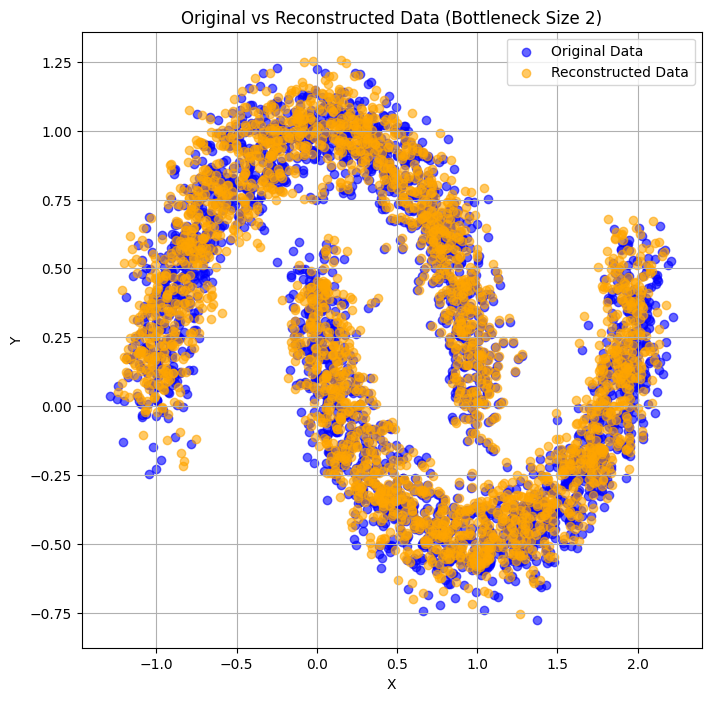

In [ ]:
test_data = make_moons(n_samples=2500, noise=0.1)[0]
test_data_tensor = torch.tensor(test_data, dtype=torch.float32)
trained_autoencoder_mmd.eval()
with torch.no_grad():
    reconstructed_data = trained_autoencoder_mmd(test_data_tensor).numpy()

#visualization
plt.figure(figsize=(8, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], label='Original Data', alpha=0.6, c='blue')
plt.scatter(reconstructed_data[:, 0], reconstructed_data[:, 1], label='Reconstructed Data', alpha=0.6, c='orange')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Original vs Reconstructed Data (Bottleneck Size 2)')
plt.grid()
plt.show()

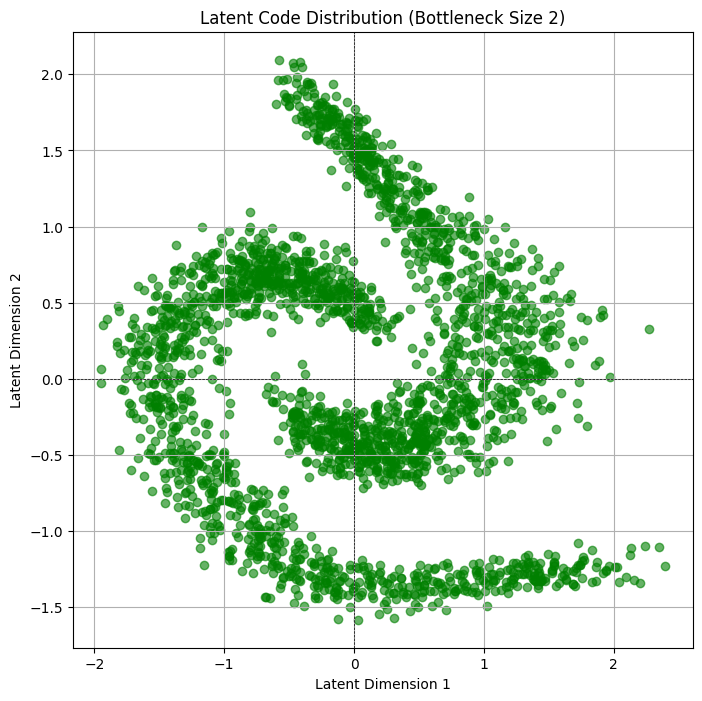

In [ ]:
# latent codes
with torch.no_grad():
    codes = trained_autoencoder_mmd.encode(test_data_tensor).numpy()

#visualization
plt.figure(figsize=(8, 8))
plt.scatter(codes[:, 0], codes[:, 1], alpha=0.6, c='green')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('Latent Code Distribution (Bottleneck Size 2)')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.grid()
plt.show()

In [ ]:
reconstruction_error = ((test_data - reconstructed_data) ** 2).mean()
print(f"Reconstruction MSE (Bottleneck Size 2): {reconstruction_error:.4f}")

Reconstruction MSE (Bottleneck Size 2): 0.0008


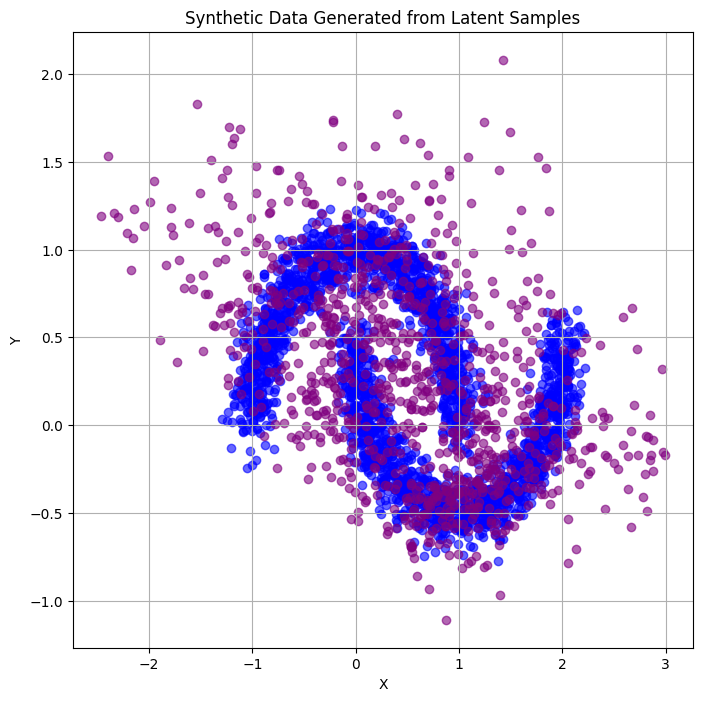

In [ ]:
#synthetic data
num_samples = 1000
latent_samples = torch.randn((num_samples, 2))
with torch.no_grad():
    synthetic_data = trained_autoencoder_mmd.decode(latent_samples).numpy()

#visualization
plt.figure(figsize=(8, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], label='Original Data', alpha=0.6, c='blue')
plt.scatter(synthetic_data[:, 0], synthetic_data[:, 1], alpha=0.6, c='purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data Generated from Latent Samples')
plt.grid()
plt.show()

# Exercise 3

In [56]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
digits = load_digits()
X = digits.data  # Features (64-dimensional flattened images)
y = digits.target  # Labels (0-9 digits)

#normalize
X = X / 16.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Reuse structure from the autoencoder from Task 1
class FlexibleAutoencoder(torch.nn.Module):
    def __init__(self, input_size, bottleneck_size, hidden_size, layers):
        super(FlexibleAutoencoder, self).__init__()
        # Encoder
        encoder_layers = [torch.nn.Linear(input_size, hidden_size), torch.nn.ReLU()]
        for _ in range(layers - 1):
            encoder_layers += [torch.nn.Linear(hidden_size, hidden_size), torch.nn.ReLU()]
        encoder_layers += [torch.nn.Linear(hidden_size, bottleneck_size)]
        self.encoder = torch.nn.Sequential(*encoder_layers)

        # Decoder (mirror of encoder)
        decoder_layers = [torch.nn.Linear(bottleneck_size, hidden_size), torch.nn.ReLU()]
        for _ in range(layers - 1):
            decoder_layers += [torch.nn.Linear(hidden_size, hidden_size), torch.nn.ReLU()]
        decoder_layers += [torch.nn.Linear(hidden_size, input_size)]
        self.decoder = torch.nn.Sequential(*decoder_layers)

    def forward(self, x):
        latent = self.encoder(x)
        reconstructed = self.decoder(latent)
        return reconstructed
    
# Function to train the autoencoder
def train_autoencoder_digits(X_train, bottleneck_size, hidden_size=128, layers=2, epochs=50, lr=0.001, batch_size=64):
    input_size = X_train.shape[1]
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    train_loader = torch.utils.data.DataLoader(X_train_tensor, batch_size=batch_size, shuffle=True)

    model = FlexibleAutoencoder(input_size=input_size, bottleneck_size=bottleneck_size, hidden_size=hidden_size, layers=layers)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    loss_fn = torch.nn.MSELoss()

    for epoch in range(epochs):
        for batch in train_loader:
            optimizer.zero_grad()
            reconstructed = model(batch)
            loss = loss_fn(reconstructed, batch)
            loss.backward()
            optimizer.step()

        print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")

    return model

In [60]:
autoencoders_digits = {}
for bottleneck_size in [2, 4, 8]:
    print(f"Training Autoencoder with Bottleneck Size {bottleneck_size}")
    autoencoders_digits[bottleneck_size] = train_autoencoder_digits(X_train, bottleneck_size)

Training Autoencoder with Bottleneck Size 2
Epoch 1/50, Loss: 0.0813
Epoch 2/50, Loss: 0.0668
Epoch 3/50, Loss: 0.0721
Epoch 4/50, Loss: 0.0556
Epoch 5/50, Loss: 0.0626
Epoch 6/50, Loss: 0.0504
Epoch 7/50, Loss: 0.0477
Epoch 8/50, Loss: 0.0493
Epoch 9/50, Loss: 0.0410
Epoch 10/50, Loss: 0.0514
Epoch 11/50, Loss: 0.0468
Epoch 12/50, Loss: 0.0455
Epoch 13/50, Loss: 0.0404
Epoch 14/50, Loss: 0.0405
Epoch 15/50, Loss: 0.0409
Epoch 16/50, Loss: 0.0338
Epoch 17/50, Loss: 0.0456
Epoch 18/50, Loss: 0.0416
Epoch 19/50, Loss: 0.0392
Epoch 20/50, Loss: 0.0355
Epoch 21/50, Loss: 0.0356
Epoch 22/50, Loss: 0.0328
Epoch 23/50, Loss: 0.0318
Epoch 24/50, Loss: 0.0355
Epoch 25/50, Loss: 0.0412
Epoch 26/50, Loss: 0.0327
Epoch 27/50, Loss: 0.0379
Epoch 28/50, Loss: 0.0312
Epoch 29/50, Loss: 0.0364
Epoch 30/50, Loss: 0.0387
Epoch 31/50, Loss: 0.0389
Epoch 32/50, Loss: 0.0422
Epoch 33/50, Loss: 0.0347
Epoch 34/50, Loss: 0.0296
Epoch 35/50, Loss: 0.0339
Epoch 36/50, Loss: 0.0297
Epoch 37/50, Loss: 0.0362
Epo

Bottleneck Size 2, Reconstruction MSE: 0.0329


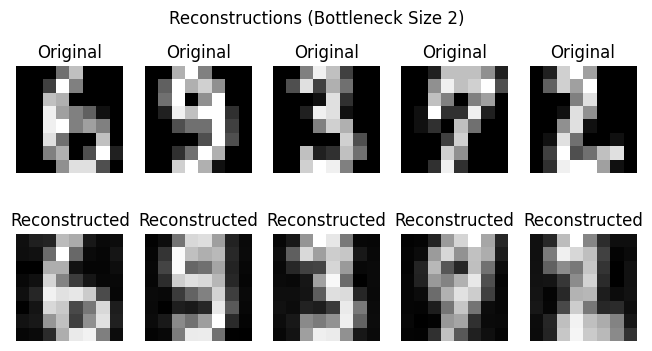

Bottleneck Size 4, Reconstruction MSE: 0.0226


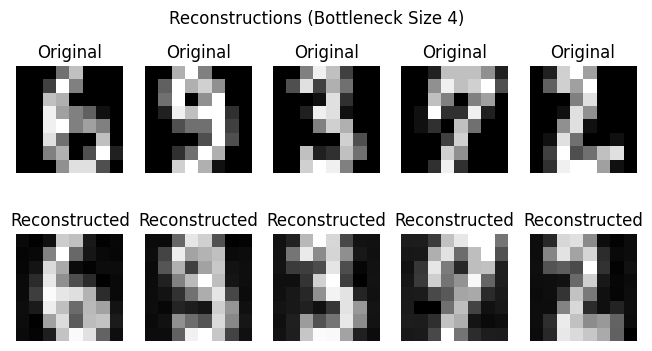

Bottleneck Size 8, Reconstruction MSE: 0.0138


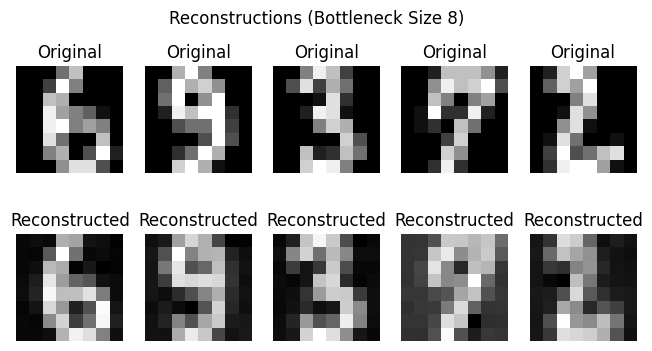

In [61]:
for bottleneck_size, autoencoder in autoencoders_digits.items():
    autoencoder.eval()
    with torch.no_grad():
        reconstructed = autoencoder(torch.tensor(X_test, dtype=torch.float32)).numpy()

    mse = ((X_test - reconstructed) ** 2).mean()
    print(f"Bottleneck Size {bottleneck_size}, Reconstruction MSE: {mse:.4f}")

    #visualization
    plt.figure(figsize=(8, 4))
    for i in range(5):
        #original
        plt.subplot(2, 5, i + 1)
        plt.imshow(X_test[i].reshape(8, 8), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        #reconstructed
        plt.subplot(2, 5, i + 6)
        plt.imshow(reconstructed[i].reshape(8, 8), cmap='gray')
        plt.title(f"Reconstructed")
        plt.axis('off')

    plt.suptitle(f"Reconstructions (Bottleneck Size {bottleneck_size})")
    plt.show()

In [ ]:
#train random forst
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_original = rf.predict(X_test)
original_accuracy = accuracy_score(y_test, y_pred_original)
print(f"Accuracy on Original Test Set: {original_accuracy:.4f}")

# Predict on reconstructed data for each bottleneck size
for bottleneck_size, autoencoder in autoencoders_digits.items():
    autoencoder.eval()
    with torch.no_grad():
        reconstructed = autoencoder(torch.tensor(X_test, dtype=torch.float32)).numpy()

    y_pred_reconstructed = rf.predict(reconstructed)
    reconstructed_accuracy = accuracy_score(y_test, y_pred_reconstructed)
    print(f"Accuracy on Reconstructed Test Set (Bottleneck Size {bottleneck_size}): {reconstructed_accuracy:.4f}")

Accuracy on Original Test Set: 0.9722
Accuracy on Reconstructed Test Set (Bottleneck Size 2): 0.8083
Accuracy on Reconstructed Test Set (Bottleneck Size 4): 0.9083
Accuracy on Reconstructed Test Set (Bottleneck Size 8): 0.9583


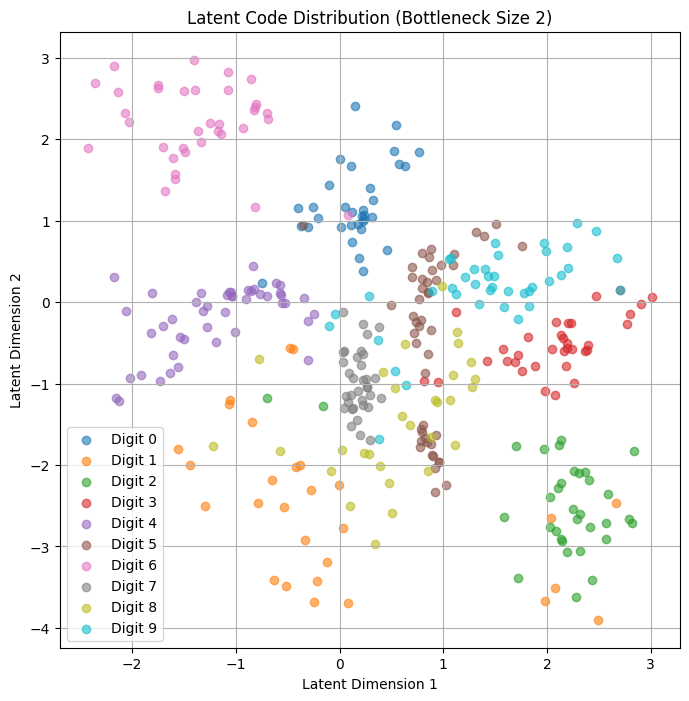

In [ ]:
# Visualize latent code distribution for bottleneck size 2
autoencoder_bottleneck_2 = autoencoders_digits[2]
with torch.no_grad():
    latent_codes = autoencoder_bottleneck_2.encoder(torch.tensor(X_test, dtype=torch.float32)).numpy()

#visualization
plt.figure(figsize=(8, 8))
for label in range(10):
    plt.scatter(latent_codes[y_test == label, 0], latent_codes[y_test == label, 1], label=f"Digit {label}", alpha=0.6)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.legend()
plt.title("Latent Code Distribution (Bottleneck Size 2)")
plt.grid()
plt.show()

In [ ]:
gmm = GaussianMixture(n_components=10)
gmm.fit(latent_codes)

synthetic_latent = gmm.sample(n_samples=1000)[0]

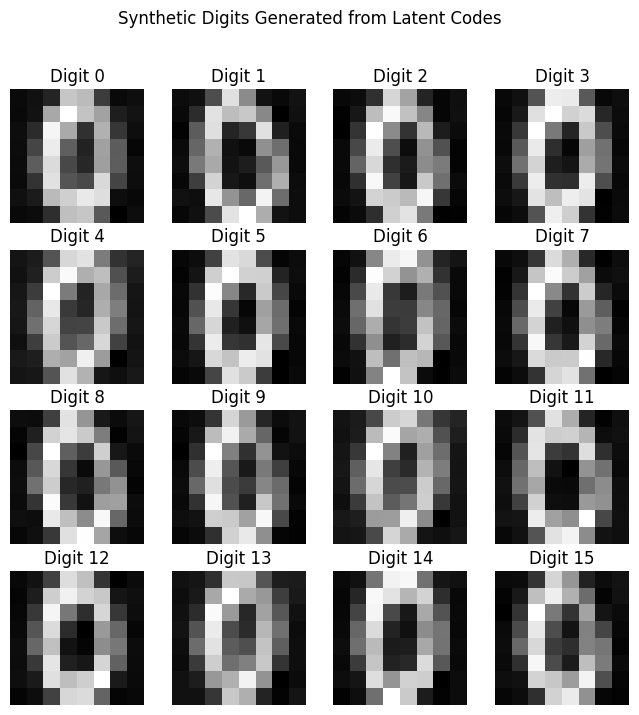

In [ ]:
# Decode the synthetic latent codes to generate synthetic digits
with torch.no_grad():
    synthetic_digits = autoencoder_bottleneck_2.decoder(torch.tensor(synthetic_latent, dtype=torch.float32)).numpy()

#visualization
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(synthetic_digits[i].reshape(8, 8), cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')
plt.suptitle("Synthetic Digits Generated from Latent Codes")
plt.show()

Class Distribution of Synthetic Digits: [ 89  65  97  63 130  58 110 111 145 132]


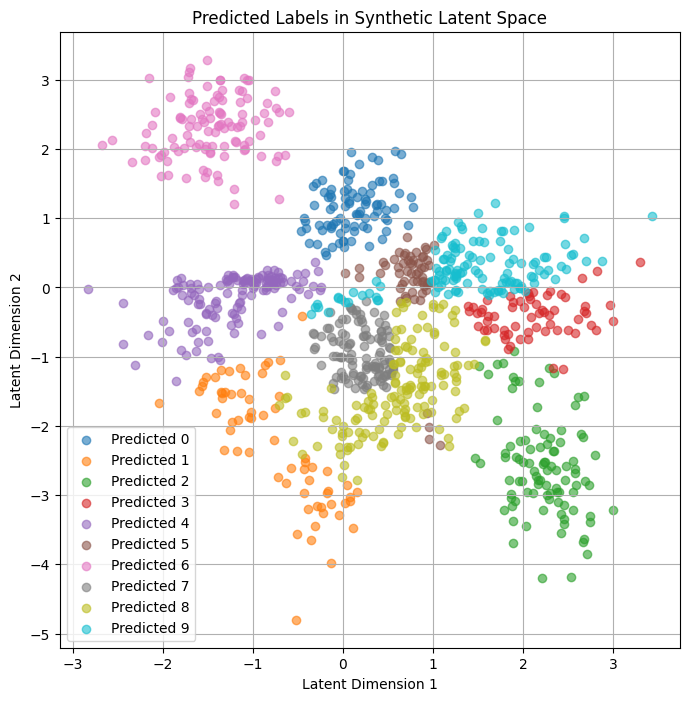

In [ ]:
synthetic_labels = rf.predict(synthetic_digits)

print(f"Class Distribution of Synthetic Digits: {np.bincount(synthetic_labels)}")

plt.figure(figsize=(8, 8))
for label in range(10):
    plt.scatter(synthetic_latent[synthetic_labels == label, 0], synthetic_latent[synthetic_labels == label, 1],
                label=f"Predicted {label}", alpha=0.6)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.legend()
plt.title("Predicted Labels in Synthetic Latent Space")
plt.grid()
plt.show()